In [1]:
import os
import shutil
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image

In [2]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.19.0


In [5]:
# Set the base directory for the dataset
base_dir = r"C:/Users/shanm/Downloads/PRCP-1001-RiceLeaf (1)/Data_old"

train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

In [7]:
# Data generators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 95 images belonging to 3 classes.
Found 24 images belonging to 3 classes.


In [9]:
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [11]:
# Train the model
history = model.fit(train_generator, validation_data=val_generator, epochs=15)

C:\Users\shanm\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 5s/step - accuracy: 0.3895 - loss: 1.1666 - val_accuracy: 0.4583 - val_loss: 1.1309
Epoch 2/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 16s 4s/step - accuracy: 0.5158 - loss: 0.9594 - val_accuracy: 0.5833 - val_loss: 1.0035
Epoch 3/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.6947 - loss: 0.8246 - val_accuracy: 0.6667 - val_loss: 0.8861
Epoch 4/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.8211 - loss: 0.6884 - val_accuracy: 0.8333 - val_loss: 0.8054
Epoch 5/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.8842 - loss: 0.5924 - val_accuracy: 0.7917 - val_loss: 0.7388
Epoch 6/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.9053 - loss: 0.5129 - val_accuracy: 0.7500 - val_loss: 0.6575
Epoch 7/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.9263 - loss: 0.4410 - val_accuracy: 0.7917 - val_loss: 0.5962
Epoch 8/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.9263 - loss: 0.3934 - val_accuracy: 0.8333 - val_loss: 0.5466
Epoch 9/15
3/3

In [13]:
# Data Augmentation Example
augmented_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

augmented_train_gen = augmented_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 95 images belonging to 3 classes.


In [15]:
# Evaluate the model
test_loss, test_acc = model.evaluate(val_generator)
print(f"Test Accuracy: {test_acc:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.8750 - loss: 0.3791
Test Accuracy: 0.88


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
 Predicted Class: Bacterial leaf blight


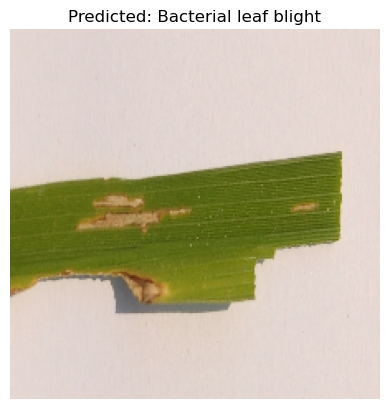

In [17]:
img_path = r"C:/Users/shanm/Downloads/PRCP-1001-RiceLeaf (1)/Data_old/test/Bacterial leaf blight/DSC_0366.jpg"
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

prediction = model.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)
class_indices = {v: k for k, v in train_generator.class_indices.items()}
print(" Predicted Class:", class_indices[predicted_class[0]])

# Show image
plt.imshow(img)
plt.title(f"Predicted: {class_indices[predicted_class[0]]}")
plt.axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


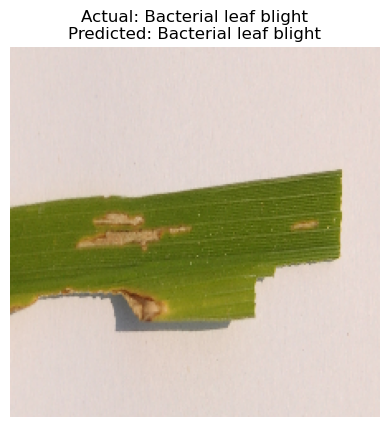

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


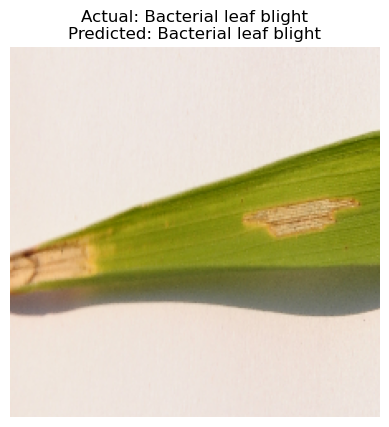

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


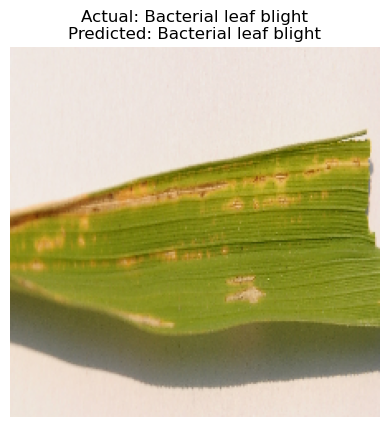

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


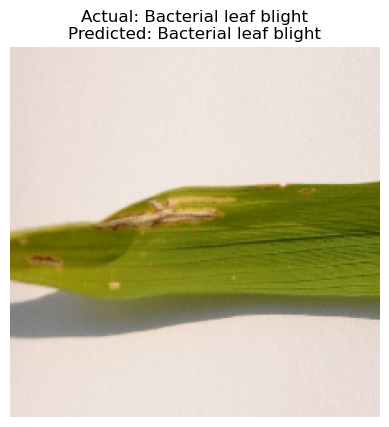

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


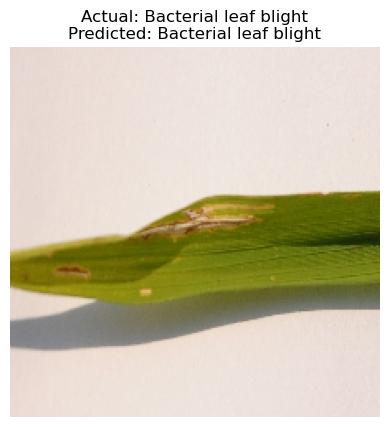

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


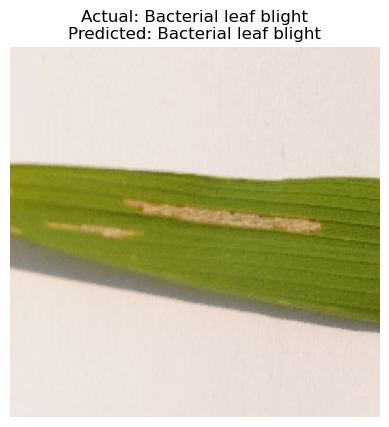

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


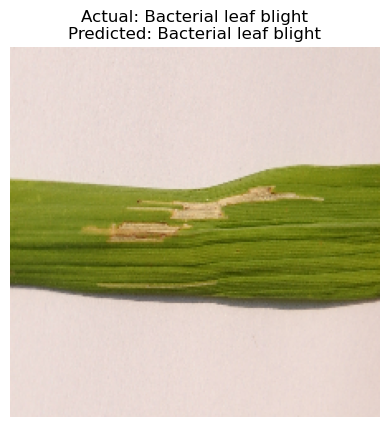

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


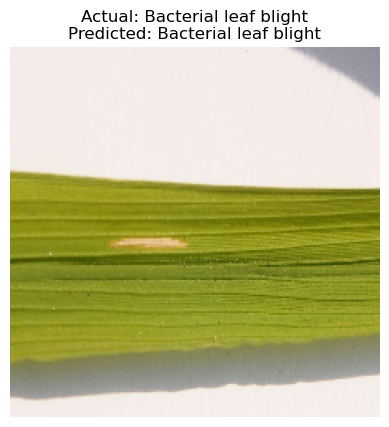

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


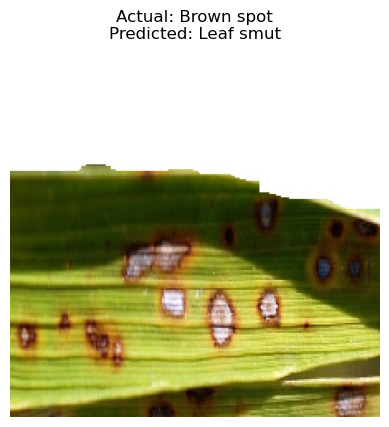

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


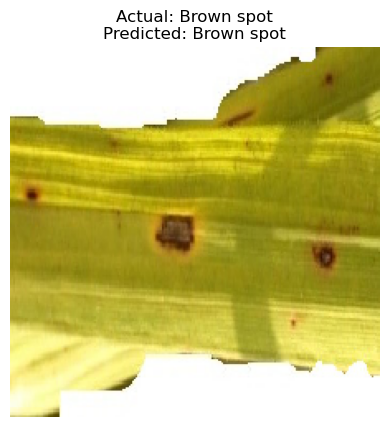

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


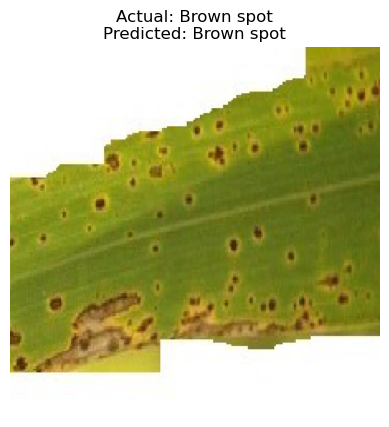

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


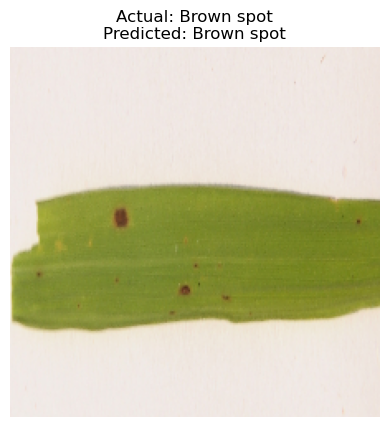

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


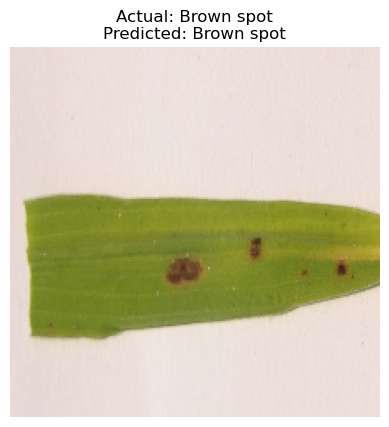

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


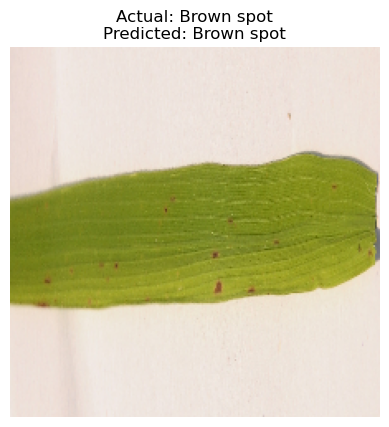

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


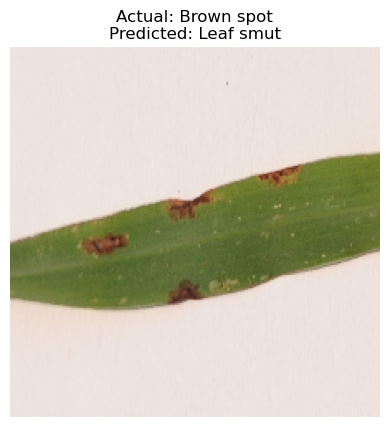

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


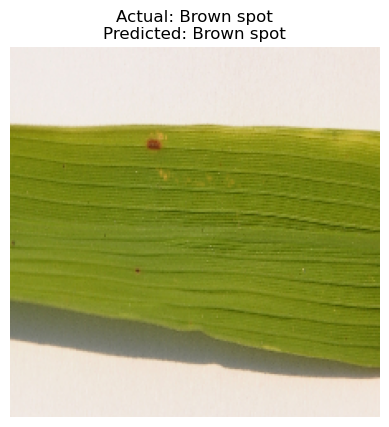

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


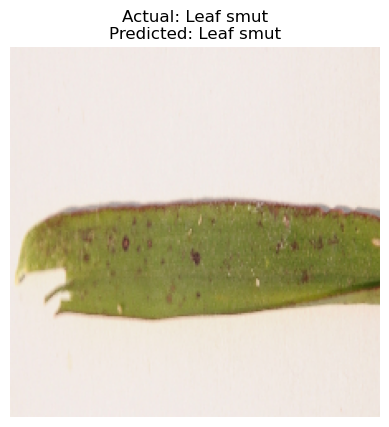

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


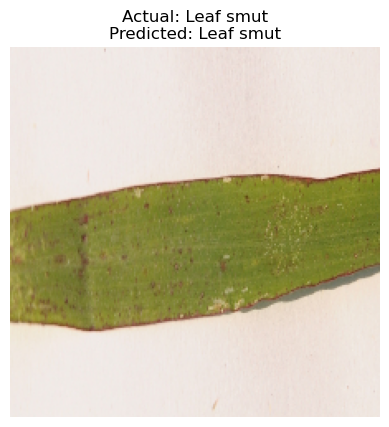

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


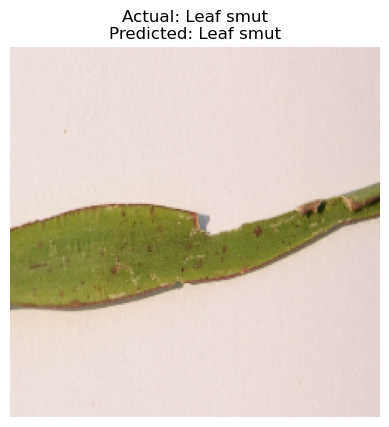

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


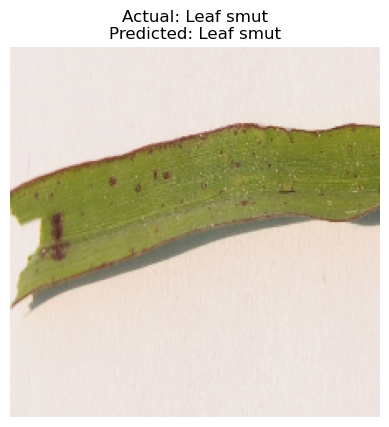

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


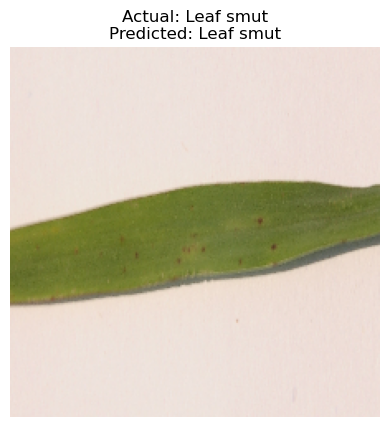

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


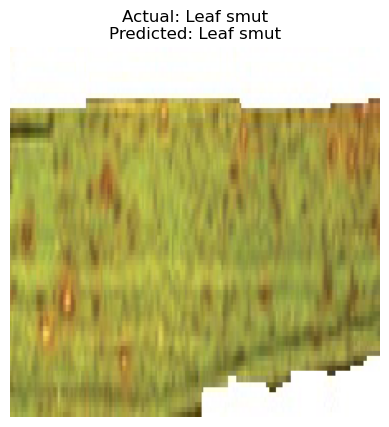

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


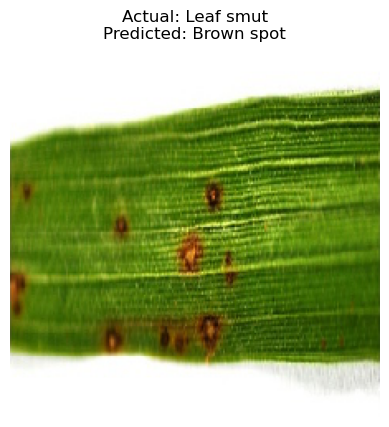

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


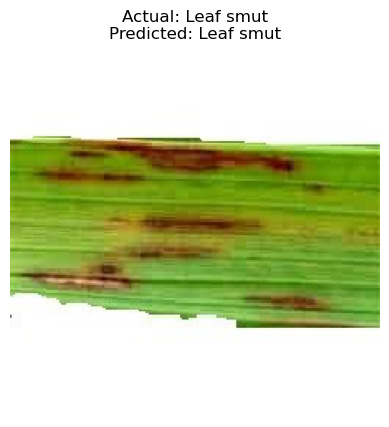

 All predictions completed. Results saved to:
C:\Users\shanm\Downloads\prediction_results.csv


In [19]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Define your test root folder and class names
test_root = r"C:\Users\shanm\Downloads\PRCP-1001-RiceLeaf (1)\Data_old\test"
class_names = ['Bacterial leaf blight', 'Brown spot', 'Leaf smut']

# To store prediction results
results = []

# Loop through each class folder
for class_name in class_names:
    class_folder = os.path.join(test_root, class_name)
    
    for img_file in os.listdir(class_folder):
        img_path = os.path.join(class_folder, img_file)
        
        try:
            # Load and preprocess the image
            img = image.load_img(img_path, target_size=(224, 224))
            img_array = image.img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0) / 255.0

            # Predict the class
            prediction = model.predict(img_array)
            predicted_class = class_names[np.argmax(prediction)]

            # Save results
            results.append({
                'Filename': img_file,
                'Actual Class': class_name,
                'Predicted Class': predicted_class
            })

            # Visualize image with prediction
            plt.imshow(img)
            plt.title(f"Actual: {class_name}\nPredicted: {predicted_class}")
            plt.axis('off')
            plt.show()

        except Exception as e:
            print(f" Error with {img_file}: {e}")

# Convert results to DataFrame and save as CSV
df = pd.DataFrame(results)
csv_path = r"C:\Users\shanm\Downloads\prediction_results.csv"
df.to_csv(csv_path, index=False)

print(f" All predictions completed. Results saved to:\n{csv_path}")
